# Topic Modeling Quora Questions

Table of Contents

- 1) Explain the problem
- 2) Import libraries
- 3) Initial Exploratory Analysis
- 4) Data prep, cleaning, 
- 5) processing
- 6) Post processing Analysis
- 7) Conclusions

## Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
import itertools
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline


In [2]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

# Import Data

In [4]:
df = pd.read_csv("C:\\Users\\User\\Documents\\IST 736 Final Project Topic Modeling\\quora_questions.csv")
df = df[df['Question'].notnull()]
df.head(20)

,Question,site_source,views,upvotes
0,What is the step by step guide to invest in sh...,1,2643,489
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,1,3878,110
2,How can I increase the speed of my internet co...,3,2265,321
3,Why am I mentally very lonely? How can I solve...,3,2278,441
4,"Which one dissolve in water quikly sugar, salt...",2,1743,272
5,Astrology: I am a Capricorn Sun Cap moon and c...,5,521,289
6,Should I buy tiago?,1,1035,127
7,How can I be a good geologist?,2,315,477
8,When do you use シ instead of し?,5,1726,228
9,Motorola (company): Can I hack my Charter Moto...,1,2381,165


# Exploratory Analysis

In [5]:
#how many words in the Raw Corpus
print(df['Question'].apply(lambda x: len(x.split(' '))).sum())

109630


- Over 4 Millon words in the corpus

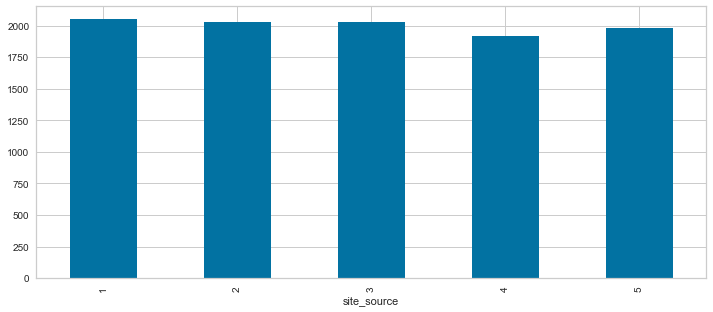

In [6]:
fig = plt.figure(figsize=(12,5))
df.groupby('site_source').Question.count().plot.bar(ylim=0)
plt.show();

- evenly distributed sample

# Visualize Token (vocabulary) Frequency Distribution Before Text Preprocessing

<Figure size 864x720 with 0 Axes>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDB06B0F0>,
          color=None,
          features=['000', '000k', '01', '03', '04', '09', '0ghz', '10', '100', '1000', '10000', '100k', '103', '1040mph', '1050', '1060', '107', '108', '1080', '109', '10k', '10th', '11', '110', '116tx', '11th', '11years', '12', '120', '125', '125k', '12k', '12th', '13', '130', '1300d', '134', '135', '138', ... 'zodiac', 'zoho', 'zomato', 'zondle', 'zone', 'zones', 'zooming', '如果不靠欺骗自己', '还能靠什么支撑自己走下去', '슬마'],
          n=None, orient='h')

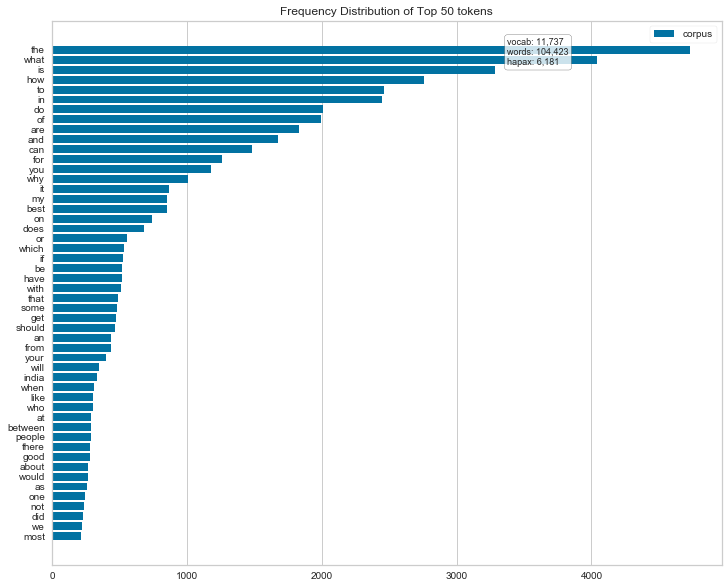

In [7]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['Question'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,10))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding. BeautifulSoup's text attribute will return a string stripped of any HTML tags and metadata.
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [13]:
df['Question'] = df['Question'].apply(clean_text)
df.head()

,Question,site_source,views,upvotes
0,step step guide invest share market india,1,2643,489
1,story kohinoor kohinoor diamond,1,3878,110
2,increase speed internet connection using vpn,3,2265,321
3,mentally lonely solve,3,2278,441
4,one dissolve water quikly sugar salt methane c...,2,1743,272


# Visualize Token Frequency Dist After Text processing


<Figure size 864x576 with 0 Axes>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDAC80CC0>,
          color=None,
          features=['00', '000', '000k', '01', '03', '075', '0c', '10', '100', '1000', '10000', '100k', '1020', '103', '1040mph', '105', '1050', '1060', '107', '108', '1080', '109', '10k', '10th', '11', '110', '1114', '116tx', '11month', '11th', '12', '120', '1213', '125', '125k', '12k', '12th', '13', '130', ...c', 'zingat', 'zionism', 'zip', 'zodiac', 'zoho', 'zomato', 'zondlecom', 'zone', 'zones', 'zooming'],
          n=None, orient='h')

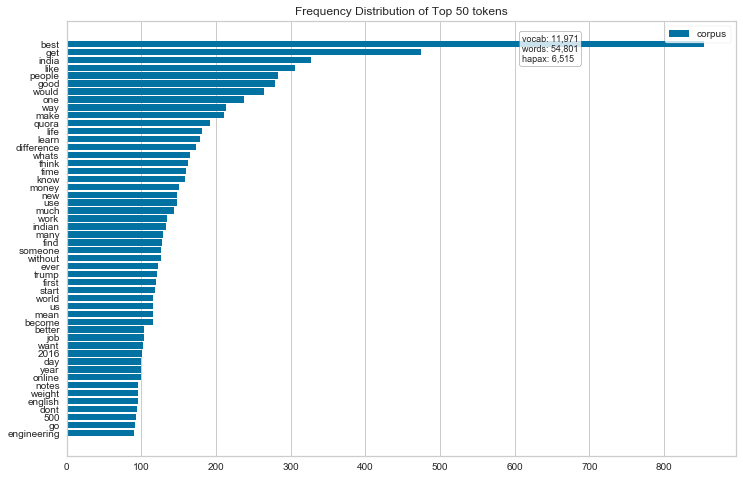

In [14]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['Question'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()

# Word Frequency

In [15]:

df.head()

,Question,site_source,views,upvotes
0,step step guide invest share market india,1,2643,489
1,story kohinoor kohinoor diamond,1,3878,110
2,increase speed internet connection using vpn,3,2265,321
3,mentally lonely solve,3,2278,441
4,one dissolve water quikly sugar salt methane c...,2,1743,272


In [22]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df.Question.str)

best               854
get                474
india              327
like               306
people             283
good               279
would              264
one                237
way                213
make               210
quora              192
life               181
learn              178
difference         173
whats              165
think              163
time               160
know               158
money              150
use                148
new                148
much               144
work               134
indian             133
many               129
find               128
someone            126
without            126
ever               122
trump              121
                  ... 
kurds                1
xperia               1
pancho               1
confidentiality      1
ruin                 1
dataframe            1
redhead              1
ftse                 1
salween              1
usf                  1
butt                 1
wouldnt              1
snooze     

# EDA using word clouds

<Figure size 864x1008 with 0 Axes>

(-0.5, 449.5, 329.5, -0.5)

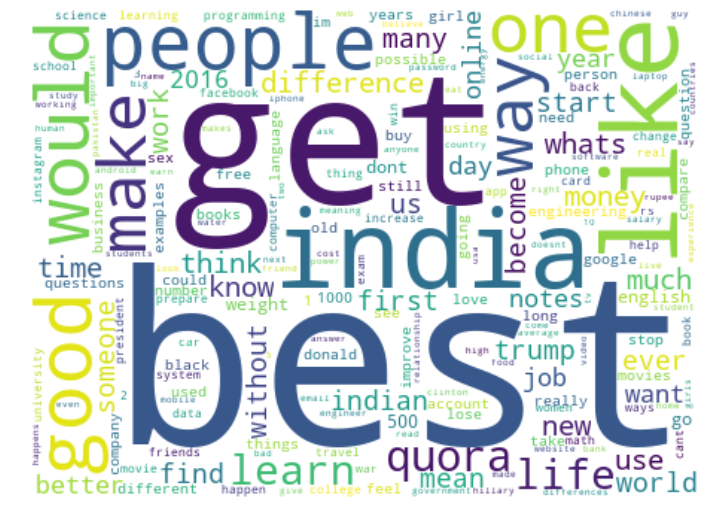

In [26]:
word_freq = gen_freq(df.Question.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# N Grams

In [29]:
from textblob import TextBlob
df['polarity'] = df['Question'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Question'].astype(str).apply(len)
df['count'] = df['Question'].apply(lambda x: len(str(x).split()))
df.head()

,Question,site_source,views,upvotes,polarity,review_len,word_count,count
0,step step guide invest share market india,1,2643,489,0.0,41,7,7
1,story kohinoor kohinoor diamond,1,3878,110,0.0,31,4,4
2,increase speed internet connection using vpn,3,2265,321,0.0,44,6,6
3,mentally lonely solve,3,2278,441,-0.1,21,3,3
4,one dissolve water quikly sugar salt methane c...,2,1743,272,0.0,60,10,10


# Word Frequency

best 854
india 327
like 306
people 283
good 279
way 213
make 210
quora 192
life 181
learn 178
difference 173
whats 165
think 163
time 160
know 158
money 150
use 148
new 148
work 134
indian 133


Question
best          854
india         327
like          306
people        283
good          279
way           213
make          210
quora         192
life          181
learn         178
difference    173
whats         165
think         163
time          160
know          158
money         150
new           148
use           148
work          134
indian        133
Name: count, dtype: int64

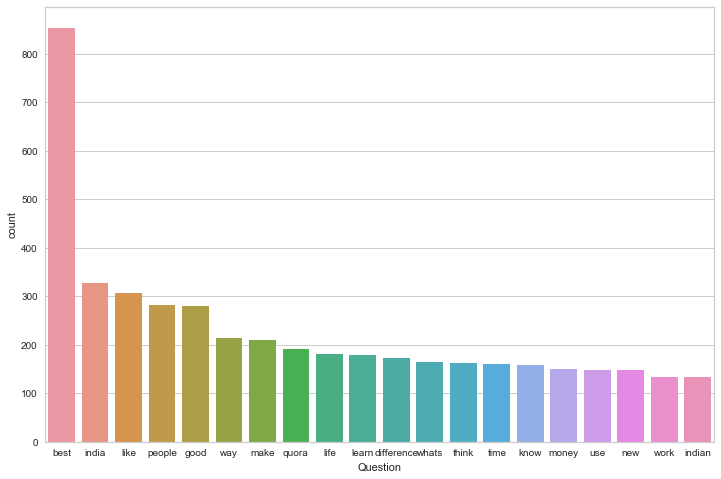

In [38]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Question'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Question' , 'count'])
df2.groupby('Question').sum()['count'].sort_values(ascending=False)

import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.barplot(x="Question", y="count", data=df2)

# Top Bi-Grams

In [56]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Question'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Question' , 'count'])



best way 109
donald trump 65
500 1000 62
make money 41
lose weight 41
whats best 38
hillary clinton 37
black money 33
money online 31
programming language 31
computer science 27
1000 notes 26
world war 26
people think 25
rupee notes 25
year old 24
earn money 24
1000 rupee 23
questions quora 22
pros cons 22


# TOP Tri-Grams

In [58]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Question'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Question' , 'count'])


1000 rupee notes 21
500 1000 rupee 19
best way learn 19
make money online 18
whats best way 16
inpatient drug alcohol 16
drug alcohol rehab 16
alcohol rehab center 16
banning 500 1000 15
things new employees 15
new employees know 15
employees know going 15
know going day 15
500 1000 notes 14
rs 500 rs 13
500 rs 1000 13
best programming language 12
earn money online 12
rs 1000 notes 12
recruit new grads 11


In [39]:
df.head()

,Question,site_source,views,upvotes,polarity,review_len,word_count,count
0,step step guide invest share market india,1,2643,489,0.0,41,7,7
1,story kohinoor kohinoor diamond,1,3878,110,0.0,31,4,4
2,increase speed internet connection using vpn,3,2265,321,0.0,44,6,6
3,mentally lonely solve,3,2278,441,-0.1,21,3,3
4,one dissolve water quikly sugar salt methane c...,2,1743,272,0.0,60,10,10


# Topic Modeling with Sklearn

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['Question'])
dtm

<9999x5179 sparse matrix of type '<class 'numpy.int64'>'
	with 42556 stored elements in Compressed Sparse Row format>

# LDA

In [41]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [42]:
# top words per topic
len(LDA.components_)

7

In [43]:
LDA.components_

array([[ 1.11634897,  1.14266605,  0.1431474 , ...,  0.14285752,
         2.14285653,  0.14331088],
       [ 5.35112046,  0.14285753,  0.14521134, ...,  0.14285745,
         0.14285724,  0.14298202],
       [ 9.16325152,  0.14285762, 19.62876237, ...,  0.14285752,
         0.14285726,  0.14290156],
       ...,
       [ 0.14304105,  0.14285759,  0.14305946, ...,  0.14285749,
         0.14285725,  0.1428575 ],
       [ 0.14295556,  0.14285759,  0.14306808, ...,  0.1428575 ,
         0.14285725,  1.35984338],
       [ 3.02943828,  0.14285757, 12.66089437, ...,  0.14285749,
         0.14285725,  7.92491795]])

In [45]:
single_topic = LDA.components_[0]
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(cv.get_feature_names()[index])

ask
work
google
increase
things
question
questions
day
difference
quora


In [46]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['car', 'answer', 'free', 'new', 'math', 'ask', 'work', 'google', 'increase', 'things', 'question', 'questions', 'day', 'difference', 'quora']


THE TOP 15 WORDS FOR TOPIC #1
['english', 'movie', 'travel', 'stop', 'time', 'years', 'good', 'love', 'old', 'best', 'girl', 'feel', 'know', 'year', 'like']


THE TOP 15 WORDS FOR TOPIC #2
['body', 'way', 'friend', 'difference', 'friends', 'online', 'believe', 'people', 'company', 'examples', 'india', 'money', 'make', 'best', 'life']


THE TOP 15 WORDS FOR TOPIC #3
['learning', 'difference', 'buy', 'computer', 'learn', 'science', 'whats', 'book', 'war', 'engineering', 'india', 'world', 'way', 'good', 'best']


THE TOP 15 WORDS FOR TOPIC #4
['school', 'word', 'women', 'email', 'phone', 'differences', 'long', 'app', 'country', 'sex', 'password', 'like', 'best', 'improve', 'number']


THE TOP 15 WORDS FOR TOPIC #5
['hillary', 'president', 'weight', 'exam', 'use', 'prepare', 'lose', 'people', 'programming', 'donald', 

In [50]:
topic_results = LDA.transform(dtm)
topic_results.argmax(axis=1)

df['topic'] = topic_results.argmax(axis=1)

df.head(10)

array([4, 6, 1, ..., 0, 0, 3], dtype=int64)

,Question,site_source,views,upvotes,polarity,review_len,word_count,count,topic
0,step step guide invest share market india,1,2643,489,0.0,41,7,7,4
1,story kohinoor kohinoor diamond,1,3878,110,0.0,31,4,4,6
2,increase speed internet connection using vpn,3,2265,321,0.0,44,6,6,1
3,mentally lonely solve,3,2278,441,-0.1,21,3,3,3
4,one dissolve water quikly sugar salt methane c...,2,1743,272,0.0,60,10,10,1
5,astrology capricorn sun cap moon cap risingwha...,5,521,289,0.0,51,8,8,5
6,buy tiago,1,1035,127,0.0,9,2,2,3
7,good geologist,2,315,477,0.7,14,2,2,3
8,use instead,5,1726,228,0.0,11,2,2,1
9,motorola company hack charter motorolla dcx3400,1,2381,165,0.0,47,6,6,2


# Post Processing Analysis

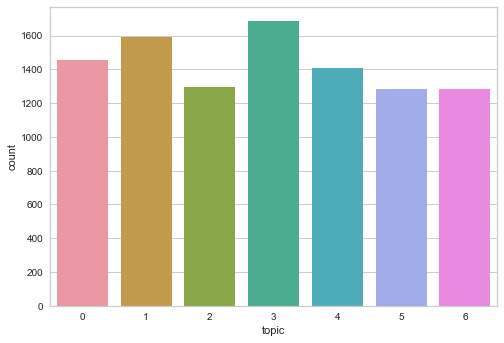

In [86]:
import pandas as pd
import matplotlib as plt

sns.countplot(df['topic'])

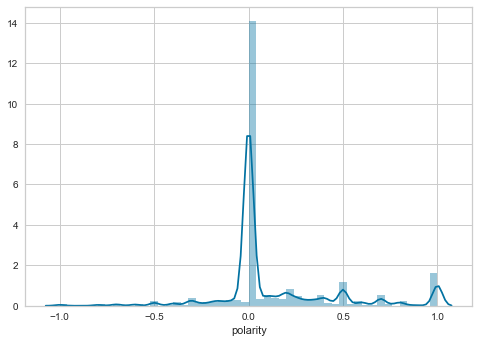

In [91]:

sns.distplot(df['polarity'])

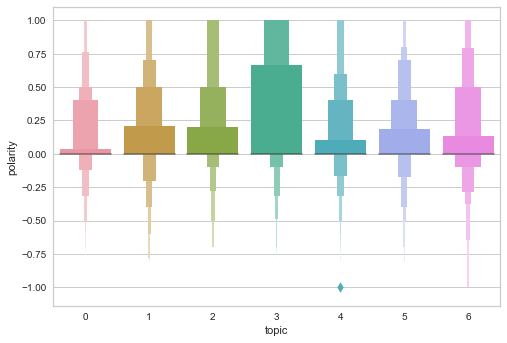

In [125]:
sns.boxenplot(x='topic', y='polarity', data=df)


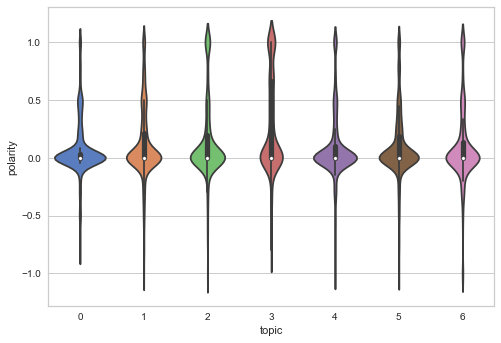

In [104]:
# Plot sepal with as a function of sepal_length across days
import seaborn as sns
g = sns.violinplot(x="topic", y="polarity", data=df, palette="muted")


In [129]:
#most negative polarity QUestions
df.Question[(df.polarity == -1)].head(20)

709                                 gruesome causes death
989                                           life boring
1040                            worst actors hindi movies
1173    bollywood worst film dialogue ever superhit hi...
1409        would donald trump worst president us history
1468                       pakistan worst democracy world
2325                                        men root evil
2338              whats worst experience youve restaurant
2398                             worst mistake youve made
3167                       whats worst thing someone done
3830                          worst companies ever worked
3946                    worst decision one ever made life
4519                                               boring
4632                          worst thing year 2016 faced
4784                                  worst traffic world
6308                          whats worst thing done work
6950                 india failing miserably rio olympics
7148          

In [130]:
#most postivie polarity QUestions
df.Question[(df.polarity == 1)].head(20)

28                            best way make money online
34                             best travel website spain
66                                   best book ever made
88                            best gaming laptop 60k inr
90                best reference book physics class 11th
103                              best fiction novel 2016
123                            greatest mystery universe
168                              best engineering fields
172                             best way gain confidence
193    best combination courses take along ca enhance...
202               whats best way start learning robotics
207           best quotes lessons assassins creed series
212    best career growth technologies automation eng...
238          online test series best gate 2017 cs stream
239    best material understanding algorithmic analys...
257                 best youtube channels learn medicine
273                         best way get traffic website
285      buy best quality custo

# LDA with Gensim

In [68]:
clean_articles = df['Question']

def get_words(x):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  return set(text.split())

In [69]:
# get unique words in the articles
unique_words = get_words(clean_articles)

# count of unique words
len(unique_words)

12029

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
    
X = vectorizer.fit_transform(clean_articles)

X.shape

(9999, 11971)

In [71]:
X_df = pd.SparseDataFrame(X, columns=vectorizer.get_feature_names(), index=range(len(clean_articles)), default_fill_value=0)

In [72]:
X_df.iloc[:10,1000:1020]

,artist,artists,arts,arvind,as400,asahi,asap,asbestos,ascension,ascertain,ashish,ashoka,ashram,ashton,asia,asian,asianamericans,asians,asides,asimov
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 most important terms 
                             min_df= 5,
                             max_df = 0.9)
    
X = vectorizer.fit_transform(clean_articles)

X.shape # check shape of the document-term matrix

(9999, 1000)

In [74]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter=100)

In [75]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
       random_state=12, tol=0.0)

In [76]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['best', 'way', 'india', 'learn', 'get', 'whats', 'movies', 'ever', 'book', 'books', '2016', 'life', 'buy', 'language', 'laptop', 'one', 'quora', 'english', 'learning', 'make', 'would', 'start', 'programming', 'places', 'online', 'time', 'movie', 'website', 'weight', 'world', 'good', 'app', 'use', 'find', 'ways', 'phone', 'like', 'visit', 'people', 'things', 'free', 'money', 'youve', 'company', 'music', 'mobile', 'new', 'job', 'college', 'heard']


Topic 1: 
['get', 'difference', 'people', 'like', 'good', 'rid', 'quora', 'one', 'much', 'make', 'india', 'job', 'whats', 'money', 'would', 'life', 'think', 'know', 'sydney', 'way', 'use', 'work', 'many', 'time', 'better', 'free', 'indian', 'online', 'someone', 'want', 'day', 'first', 'system', 'new', 'dont', 'card', 'back', 'become', 'possible', 'without', 'really', 'account', 'us', 'feel', 'acne', 'person', 'questions', 'mean', 'girl', 'school']


Topic 2: 
['difference', 'whats', 'india', 'main', 'science', 'knowledge', 'like', 